## Madhira Durga Dattatreya Sarma
Data Science and Business Analytics Intern

The Sparks Foundation                                                

# TASK 6: Prediction using Decision Tree Algorithm

### Problem Statement

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Approach

Create the Decision Tree classifier and visualize it graphically.

### What is Decission Tree?

A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions

## Step 1: Importing the required Library

In [160]:

#Import  Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Step 2: Data Preparation 

### Data Loading

In [163]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('../input/tsf-iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Inspection

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


### Data Cleaning

In [166]:

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [167]:
df.drop('Id',axis=1,inplace=True)

## Step 3: EDA

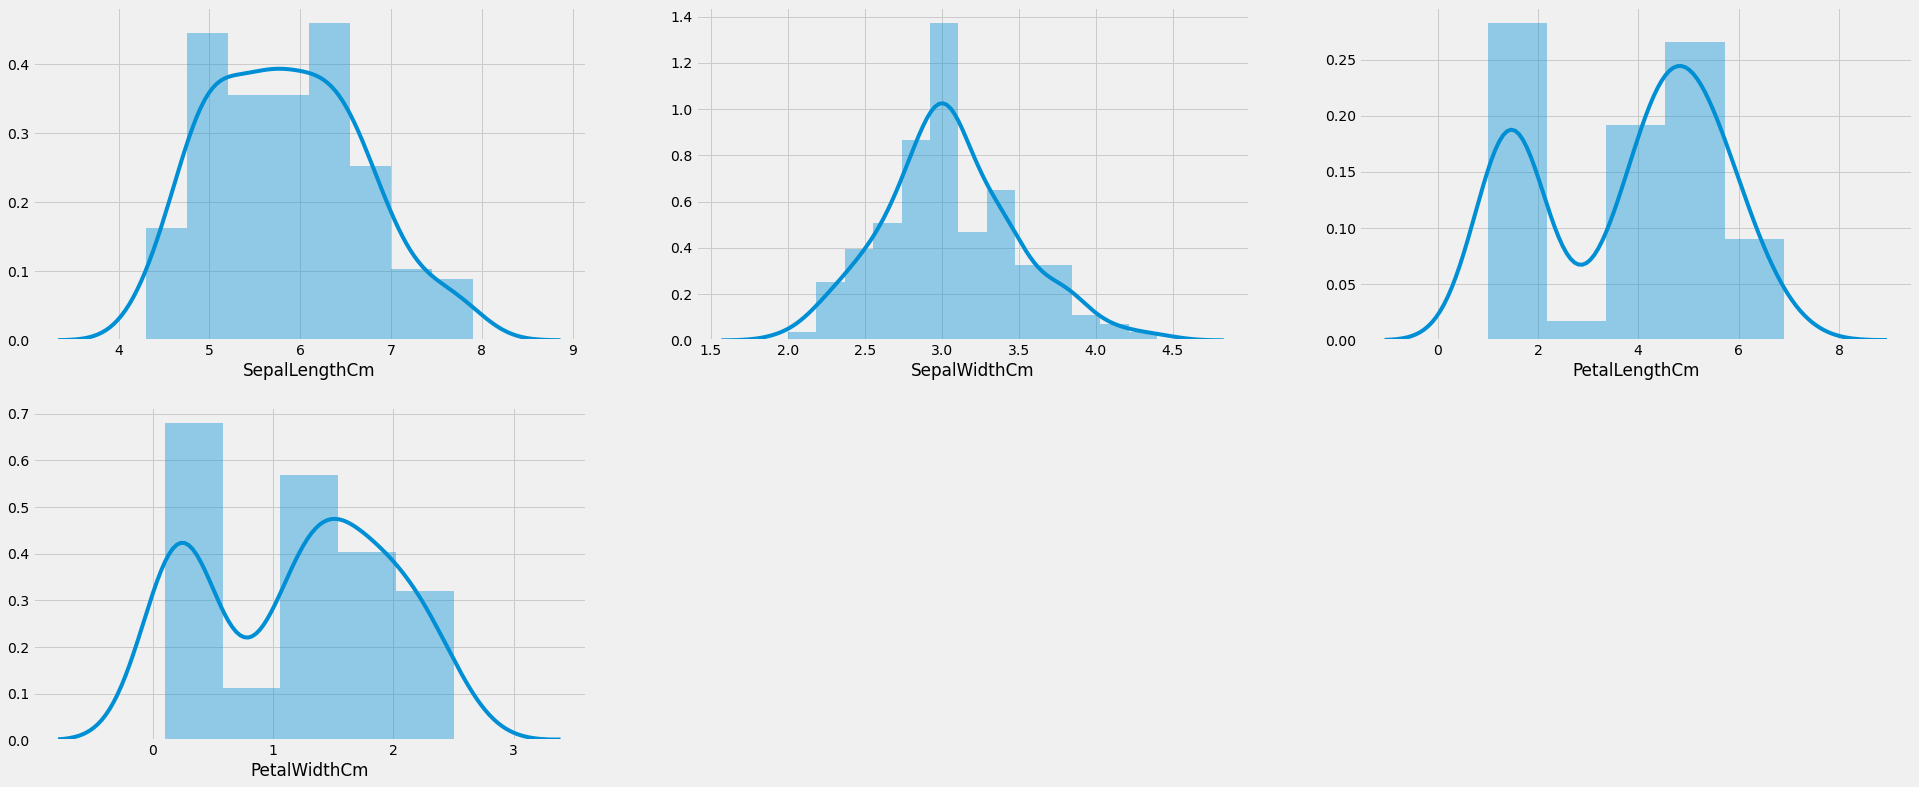

In [168]:
plt.figure(figsize = (30,40))
feature = df.columns[:-1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.distplot(df[i[1]])

1. SepalLengthCm, SepalWidthCm are Normal Distributed
2. PetalLengthCm, PetalWidthCm are not Normal Distributed

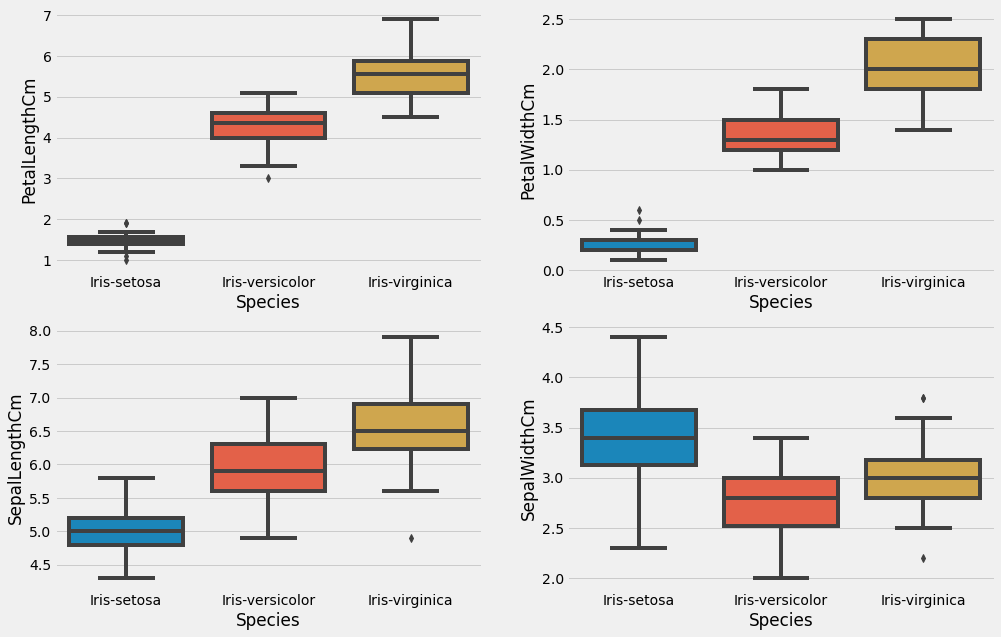

In [169]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

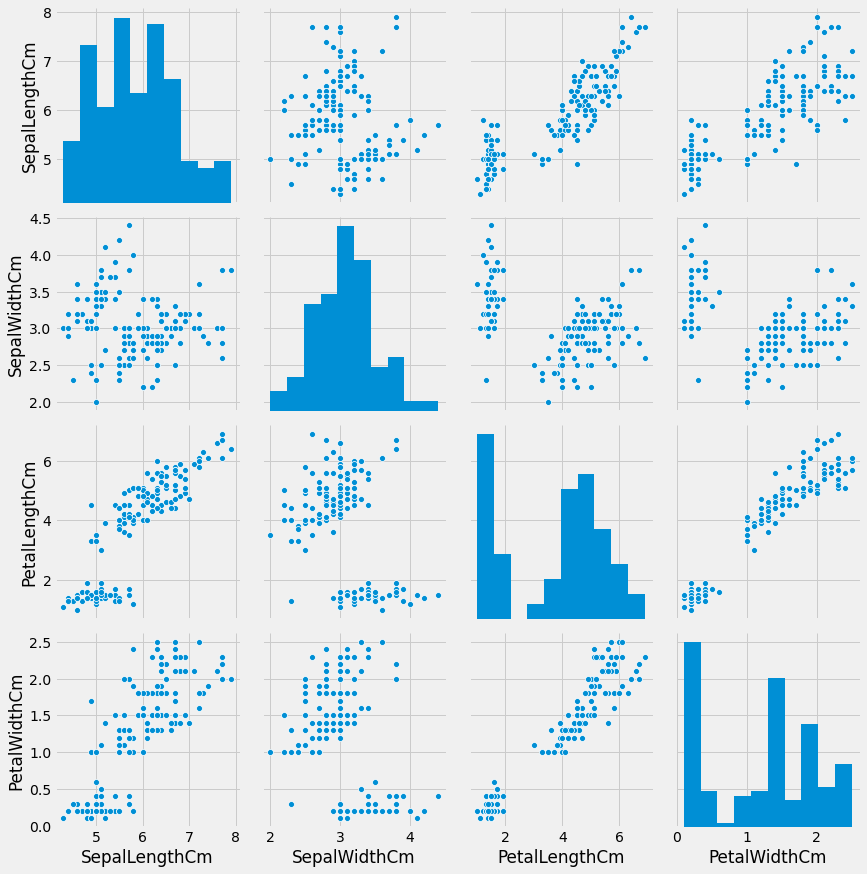

In [170]:
sns.pairplot(df,size=3)
plt.show()

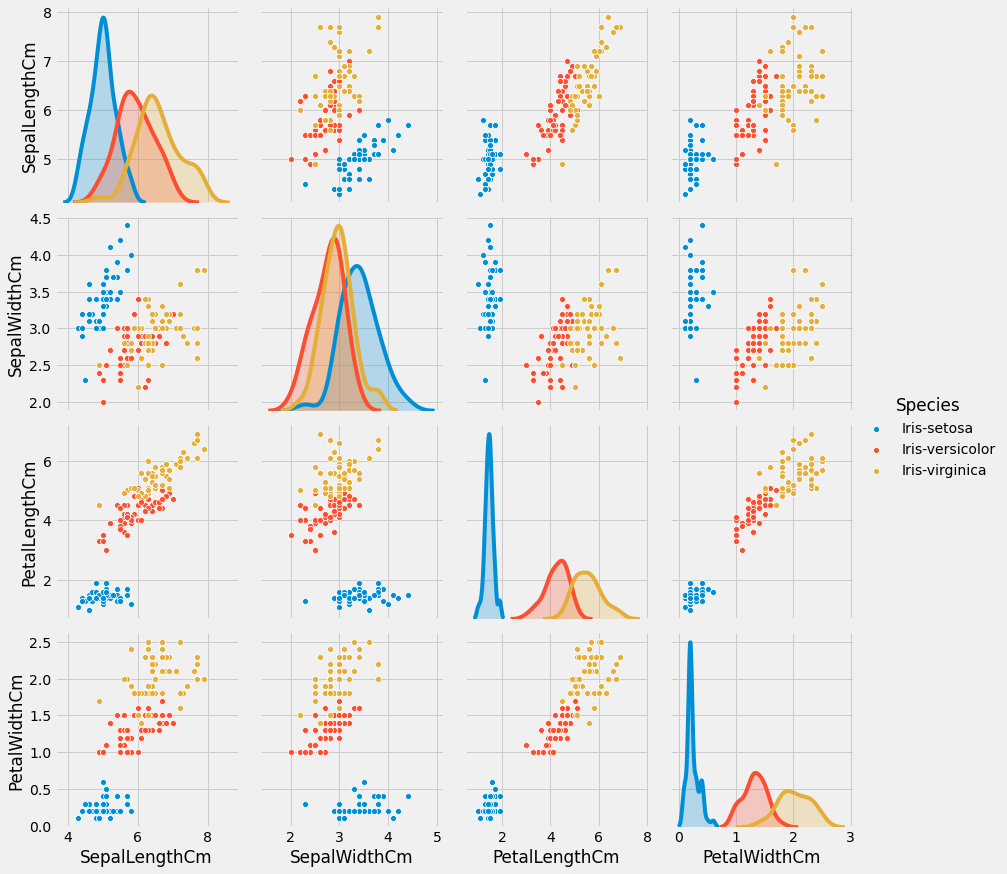

In [171]:
sns.pairplot(df,hue = 'Species',size=3)
plt.show()

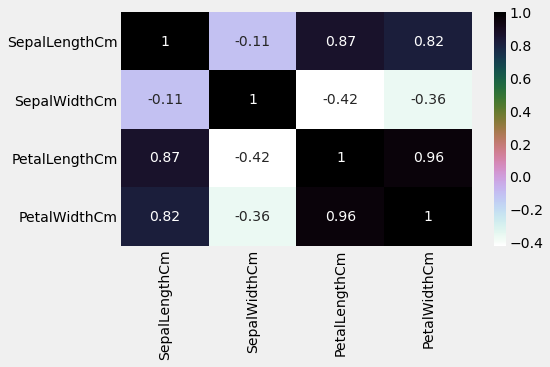

In [172]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix 
plt.show()

From the above heatmap we can say Petal Length and Petal Width are highly correlated

## Step 4: Train-Test Split

In [173]:
# in this our main data is split into train and test
train, test = train_test_split(df, test_size = 0.3)
# test_size=0.3 splits the data into 70% and 30% ratio. 
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [174]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values# taking the training data features
y_train=train.Species# output of our training data
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values # taking test data features
y_test =test.Species   #output value of test data

In [175]:
X_train[1:5]

array([[5.7, 3. , 4.2, 1.2],
       [5.8, 2.6, 4. , 1.2],
       [4.4, 3. , 1.3, 0.2],
       [6. , 2.7, 5.1, 1.6]])

In [176]:
y_train.head()

51    Iris-versicolor
95    Iris-versicolor
92    Iris-versicolor
38        Iris-setosa
83    Iris-versicolor
Name: Species, dtype: object

### Training the Model

In [177]:
from sklearn import metrics
model=DecisionTreeClassifier(criterion='gini',random_state=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9333333333333333


In [178]:
print("Confusion Matrix:",confusion_matrix(y_test,prediction))

Confusion Matrix: [[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [179]:
print("Report:",classification_report(y_test,prediction))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [180]:
!pip install pydotplus

### Visualize the Decision Tree Classifier algorithm graph

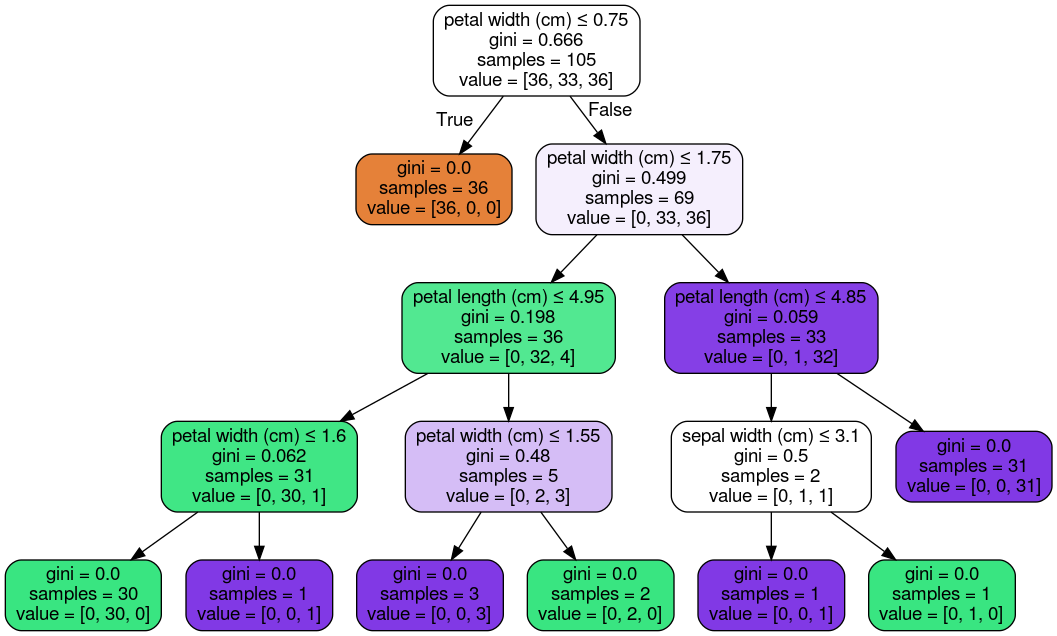

In [181]:
## Function to make tree
from io import StringIO ## for Python 3
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target
Feature_cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=10)
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=Feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())